# Housing Prices Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Data Loading


In [ ]:
# Load data
training_data = pd.read_csv("/content/sample_data/train.csv")
test_data = pd.read_csv("/content/sample_data/test.csv")

# Data Preprocessing

Cleaning and preparing the data for analysis by handling missing values and excluding certain columns.
- Filling missing values in numerical attributes with their mean values.
- Removing specific categorical columns and filling missing values in the rest with 'None'.


In [ ]:
# Handle missing data for categorical and numerical columns
categorical_columns = training_data.select_dtypes(include='object')
numerical_attributes = training_data.select_dtypes(exclude='object').drop(['SalePrice', 'Id'], axis=1).copy()

for column in ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']:
    numerical_attributes[column].fillna(numerical_attributes[column].mean(), inplace=True)

columns_to_delete_categorical = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
categorical_columns = categorical_columns.drop(columns_to_delete_categorical, axis=1)
categorical_columns = categorical_columns.fillna('None')

cc = training_data.select_dtypes(include='object')
cc.isna().sum().sort_values(ascending=False)

# Exploratory Data Analysis (EDA)

Visualizing different aspects of the data to gain insights.
- Visualization 1: Showing the distribution of Sale Prices in the dataset.
- Visualization 2: Displaying a heatmap to understand correlations between different features.
- Visualization 3: Using box plots to compare Sale Prices across different neighborhoods.
- Visualization 4: Creating scatter plots to observe relationships between Sale Prices and key numerical variables like 'GrLivArea'.


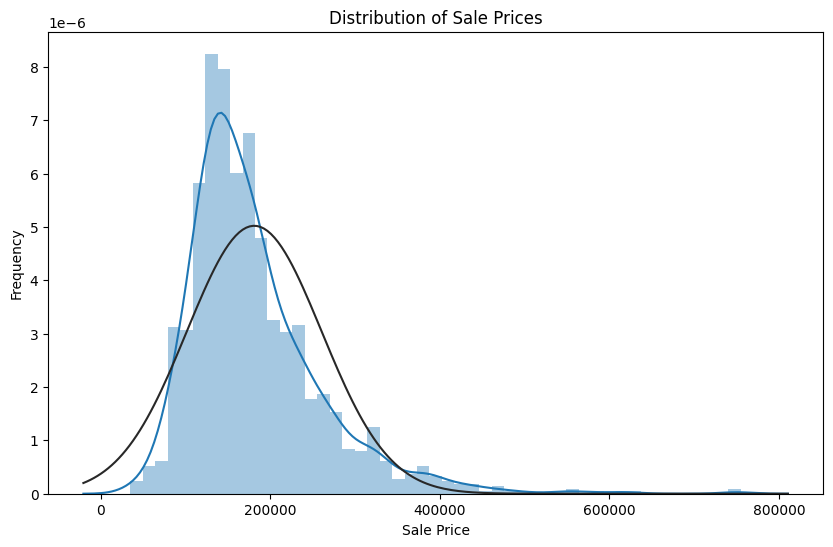

In [ ]:
# Visualization 1: Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.distplot(training_data['SalePrice'], fit=norm)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

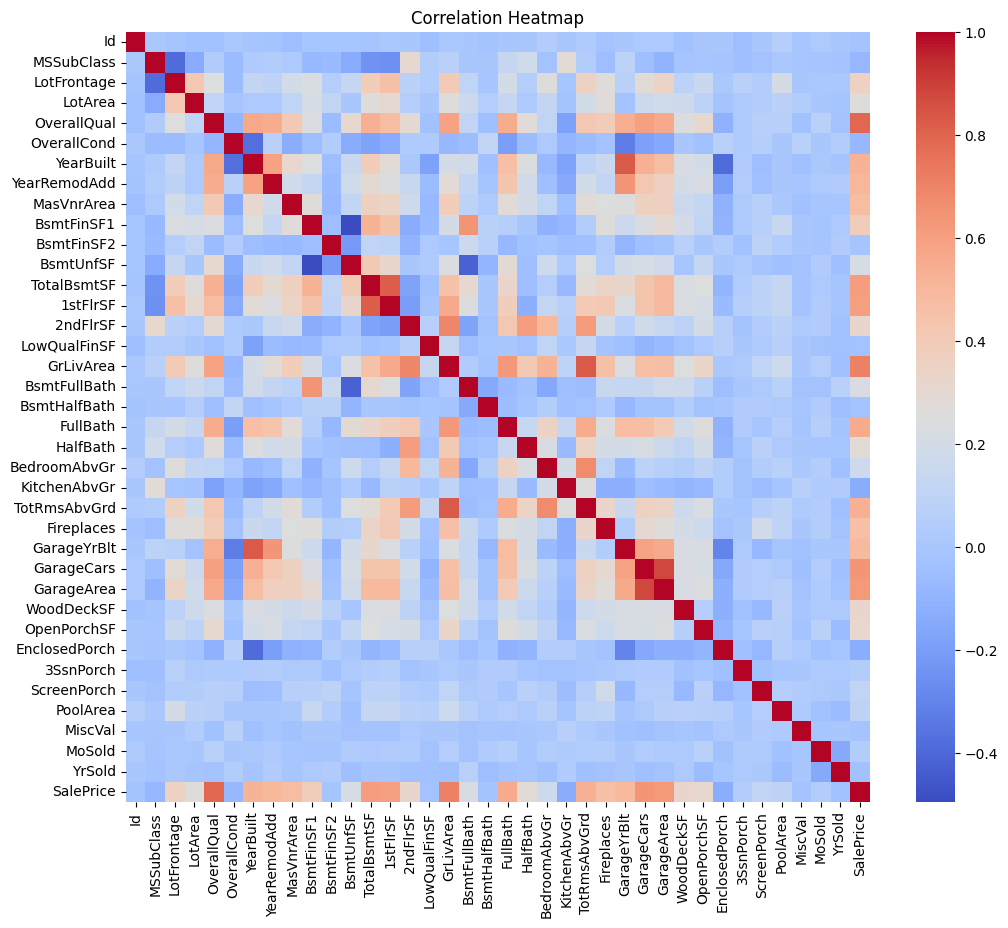

In [ ]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(training_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

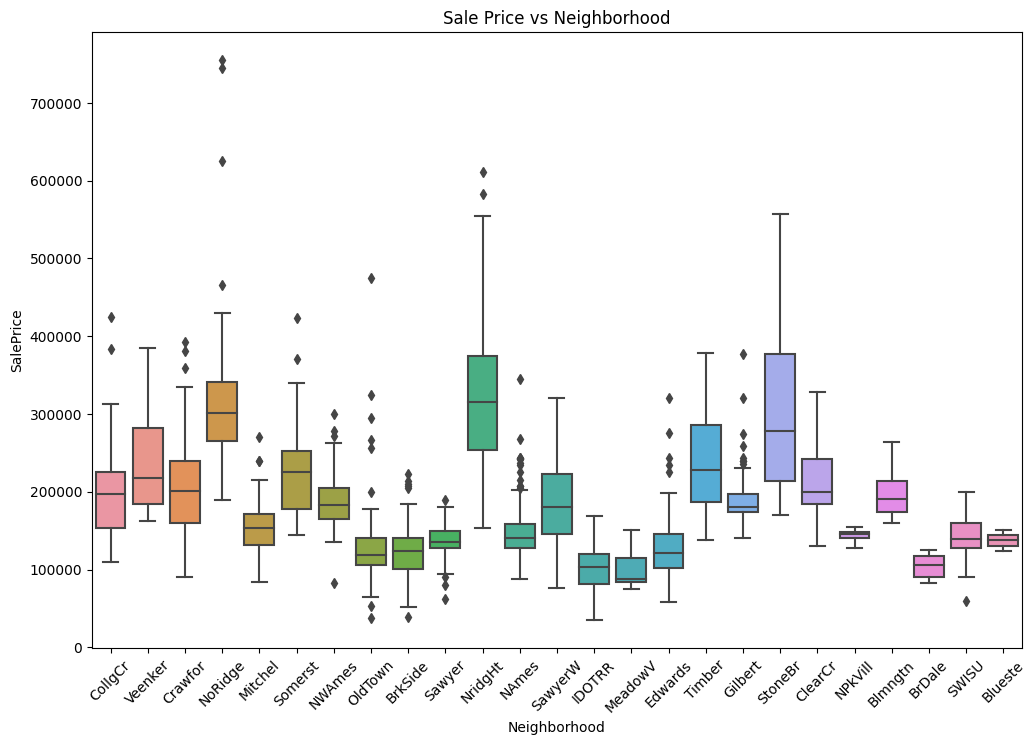

In [ ]:
# Visualization 3: Box Plots for Categorical Variables vs Sale Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=training_data)
plt.xticks(rotation=45)
plt.title('Sale Price vs Neighborhood')
plt.show()

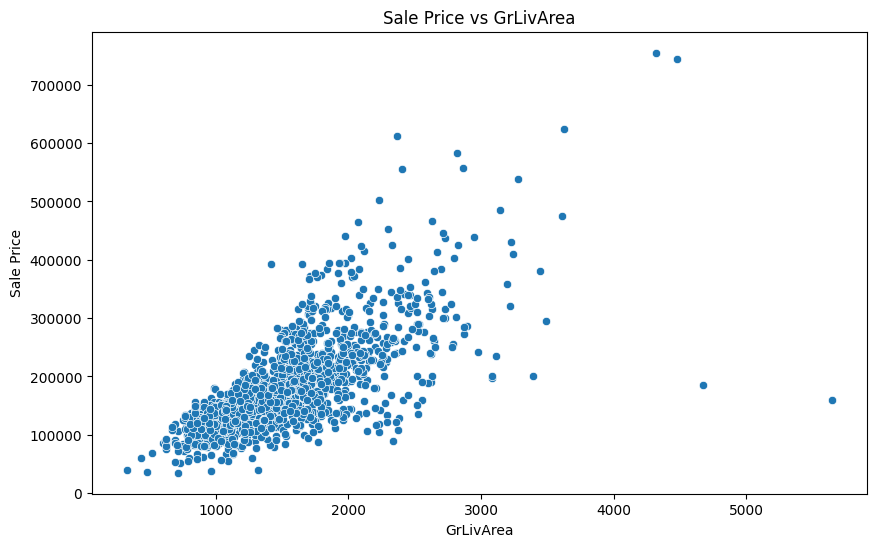

In [ ]:
# Visualization 4: Scatter Plots for Important Numerical Variables vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=training_data['GrLivArea'], y=training_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Sale Price vs GrLivArea')

plt.show()


# Visualization Conclusions:

- Distribution of Sale Prices (Visualization 1): This histogram illustrates the right-skewed distribution of sale prices, indicating the prevalence of lower-priced homes in the dataset.

- Correlation Heatmap (Visualization 2): The heatmap reveals the degrees of correlation between various features, highlighting those with significant influence on the sale price.

- Box Plots for Categorical Variables vs Sale Price (Visualization 3): These box plots show the variation in median house prices across different neighborhoods, underscoring the impact of location on property values.

- Scatter Plots for Important Numerical Variables vs Sale Price (Visualization 4): The scatter plot between 'GrLivArea' and sale prices demonstrates a clear positive correlation, suggesting that larger homes tend to have higher prices.

# Feature Engineering

Enhancing the dataset with additional features to improve model performance.
- Creating an interaction term 'GrLivArea_TotalBsmtSF' to capture combined effects of two features.
- Applying log transformation to 'SalePrice' to normalize its distribution.


In [ ]:
# Advanced Feature Engineering: Creating an interaction term
training_data['GrLivArea_TotalBsmtSF'] = training_data['GrLivArea'] * training_data['TotalBsmtSF']

# Log Transformation of the Target Variable
training_data['SalePrice'] = np.log(training_data['SalePrice'])


In [ ]:
# Prepare the final data frame
final_data_frame = pd.concat([categorical_columns, numerical_attributes, training_data[['GrLivArea_TotalBsmtSF', 'SalePrice']]], axis=1)
final_data_frame_encoded = pd.get_dummies(final_data_frame)


# Model Training and Validation

Splitting the preprocessed data into training and validation sets.

Training a RandomForestRegressor model using GridSearchCV for hyperparameter tuning.


In [ ]:
# Splitting data into training and validation sets
features = final_data_frame_encoded.drop(['SalePrice'], axis=1)
target = final_data_frame_encoded['SalePrice']
train_features, val_features, train_target, val_target = train_test_split(features, target, test_size=0.2, random_state=1)

In [ ]:
# Model training with RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_target)

# Evaluate the model
val_predictions = grid_search.predict(val_features)
mae_val = mean_absolute_error(val_target, val_predictions)
print("Validation Mean Absolute Error:", mae_val)

Validation Mean Absolute Error: 0.09625614620733751


# Test Data Preprocessing, Predictions, and Results

Model Evaluation: We assess the performance of the trained model on the validation set using the Mean Absolute Error (MAE) metric. This metric provides insight into the average magnitude of the model's prediction errors.

Test Data Preprocessing: The test dataset undergoes preprocessing steps similar to those applied to the training data. This ensures consistency in data format and structure for accurate predictions.

Predictions on Test Data: Using the trained model, predictions are made on the test dataset. The first five predictions are displayed to give an immediate sense of the model's output.

Residual Plot: This plot visualizes the residuals, which are the differences between the actual and predicted values. Analyzing the residuals helps diagnose the model's performance and identify any systematic errors.

Prediction vs. Actual Scatter Plot: A scatter plot comparing the model's predictions against the actual values is generated. This plot is crucial for visually evaluating the accuracy of the predictions and understanding how closely they align with the real values.



In [ ]:
# Test data preprocessing
test_data_clean = test_data.drop(columns_to_delete_categorical + ['Id'], axis=1)
test_data_clean_numeric = test_data_clean.select_dtypes(exclude=['object'])
test_data_clean_category = test_data_clean.select_dtypes(include=['object'])
test_data_clean_numeric = test_data_clean_numeric.fillna(0)
test_data_clean_category = test_data_clean_category.fillna("None")

In [ ]:
# Creating an interaction term in test data
test_data_clean['GrLivArea_TotalBsmtSF'] = test_data_clean['GrLivArea'] * test_data_clean['TotalBsmtSF']

# Preparing final test data
test_data_final = pd.concat([test_data_clean_category, test_data_clean_numeric, test_data_clean[['GrLivArea_TotalBsmtSF']]], axis=1)
test_data_final_encoded = pd.get_dummies(test_data_final)


In [ ]:
# Aligning and predicting on test data
final_train_data, final_test_data = features.align(test_data_final_encoded, join='left', axis=1)
final_test_data.fillna(0, inplace=True)

# Predictions on test data
predictions_test = np.exp(grid_search.predict(final_test_data))  # Inverse log transformation

print("Predictions for the first 5 houses in the test data:")
print(predictions_test[:5])

Predictions for the first 5 houses in the test data:
[127926.77858781 156914.81449743 174756.7394119  182790.15818175
 192052.88427038]


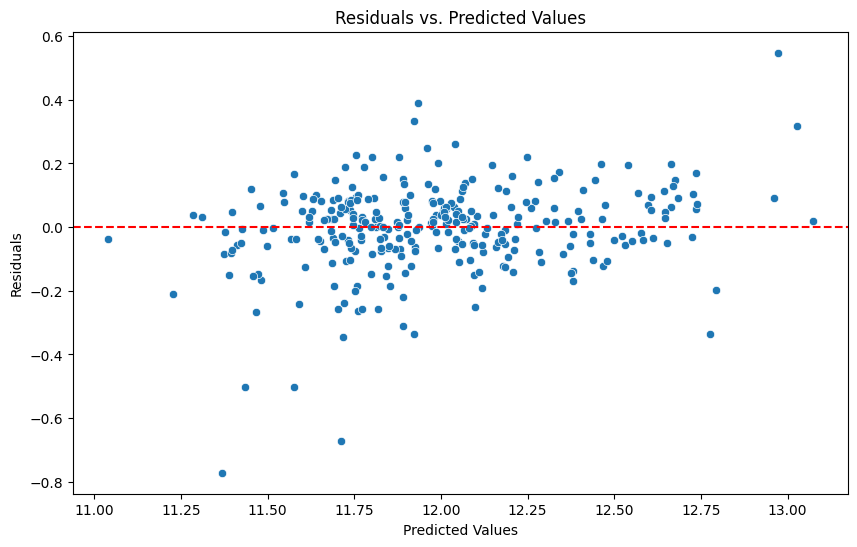

In [ ]:
# Residual Plot
residuals = val_target - val_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


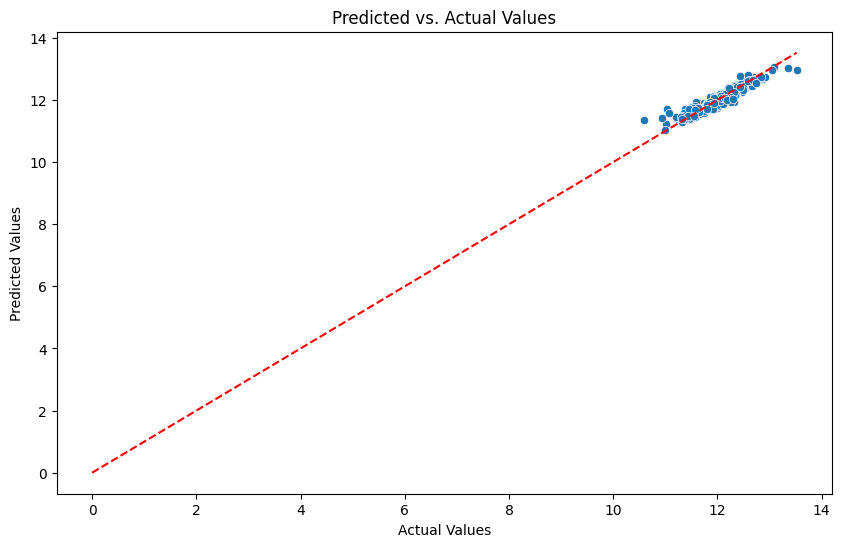

In [ ]:
# Prediction vs. Actual Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_target, y=val_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
# Plotting the identity line
max_val = max(val_target.max(), val_predictions.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')
plt.show()

# Conclusion

The residual plot did not show any apparent systematic patterns, suggesting that the model's predictions were largely unbiased. However, some spread in the residuals indicates variability in the model's performance, which is common in real-world datasets.

The prediction vs. actual scatter plot demonstrated a strong alignment along the diagonal line, indicating that the model was generally successful in predicting the housing prices. There were, however, some deviations suggesting room for further model tuning and exploration of additional features that might capture the nuances of those segments better.